In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import json
import glob
import os

In [2]:
base = "../exp/"
paths = glob.glob(base + "rphast/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
queries = pd.DataFrame.from_records([{
    **algo,
    'experiment': exp['experiment'],
    'target_set_size_exp': exp['target_set_size_exp'],
    'ball_size_exp': exp['ball_size_exp'],
    'graph': { 'europe': 'DIMACs Europe', 'osm_ger': 'OSM Germany', 'osm_europe': 'OSM Europe' }[[x for x in run['args'][1].split('/') if x != ''][-1]],
    }
    for run in data for exp in run['experiments'] for algo in exp['algo_runs']])

In [4]:
queries['running_time_s'] = queries['running_time_ms'] / 1000.0

In [10]:
queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 14].loc[lambda x: x['ball_size_exp'] == 21]['running_time_ms'].describe()

count     200.00
mean    3,758.09
std       748.88
min     2,178.02
25%     3,173.52
50%     3,601.14
75%     4,461.53
max     6,565.60
Name: running_time_ms, dtype: float64

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

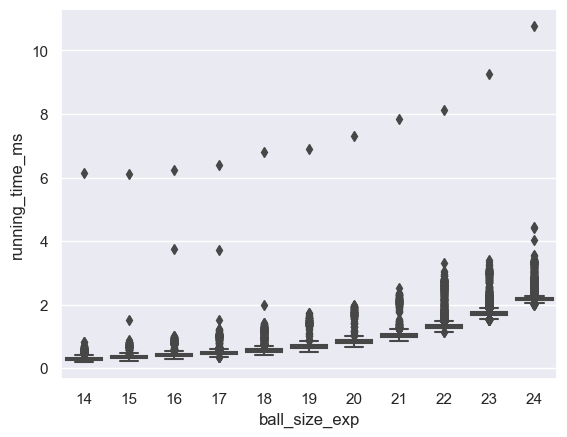

In [25]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 10], x='ball_size_exp', y='running_time_ms')

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

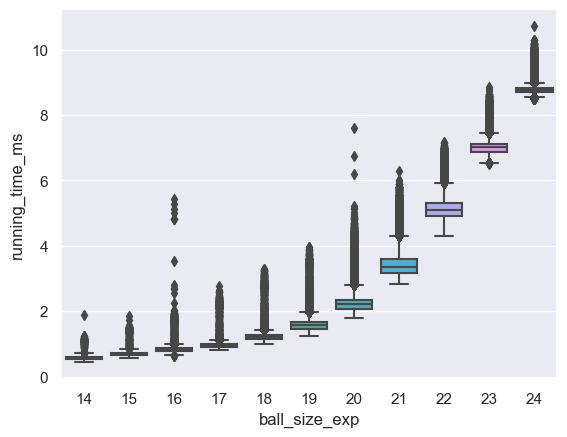

In [23]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 12], x='ball_size_exp', y='running_time_ms')

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

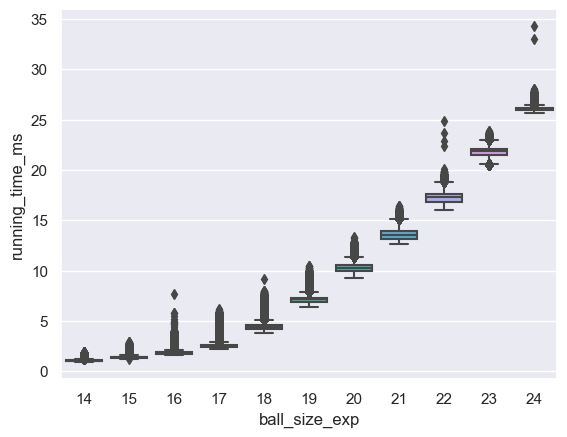

In [24]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='running_time_ms')

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

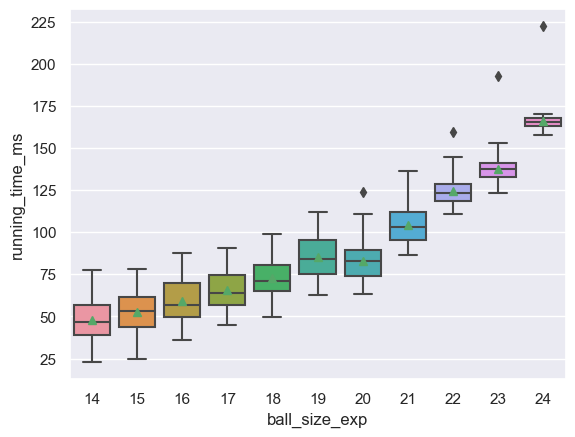

In [19]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 10], x='ball_size_exp', y='running_time_ms', showmeans=True)

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

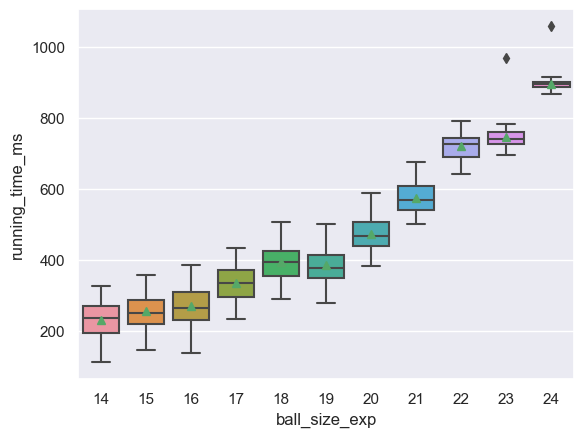

In [20]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 12], x='ball_size_exp', y='running_time_ms', showmeans=True)

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

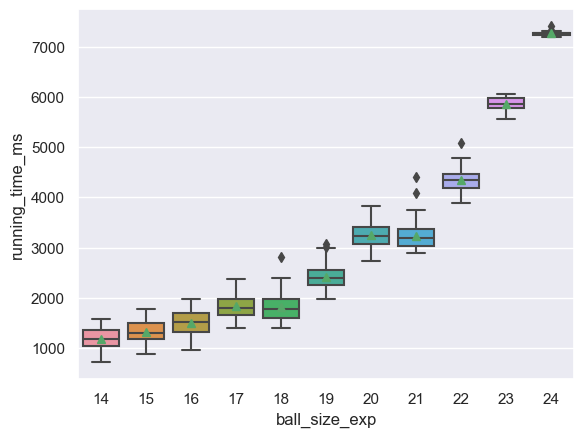

In [21]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='running_time_ms', showmeans=True)